In [1]:
# Local paths
dir_pfx = './'
data_dir = dir_pfx + '../../data/Vehicules1024/'
# Add the local_modules directory to the set of paths
# Python uses to look for imports.
import sys
sys.path.append(dir_pfx)
sys.path.append('../')

In [2]:
#!pip3 install -q git+https://www.github.com/keras-team/keras-contrib.git
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from importlib import reload
import utils

Using TensorFlow backend.


In [6]:
reload(utils)

<module 'utils' from '../utils.py'>

In [3]:
#num_images = 3
#files = utils.scan_dataset(data_dir, num_images) #TODO: 50
#training_set, testing_set = utils.create_subsets(files, data_dir, use_validation=False)
#im_hr, im_lr, batch_idx = utils.load_data(0, training_set, data_dir, True, len(training_set))
vehicles_dir = dir_pfx + '../../data/vehicle_patches_64/'
#im_hr, im_lr = utils.load_data_vehicles(vehicles_dir, 1, img_spec=2021)
im_hr, im_lr = utils.load_data_vehicles(vehicles_dir, 3718, scale01=True)

using 3718 images
3718


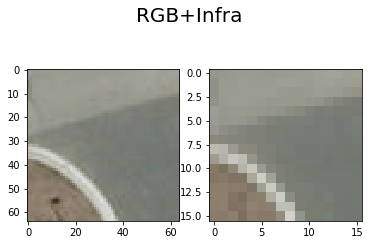

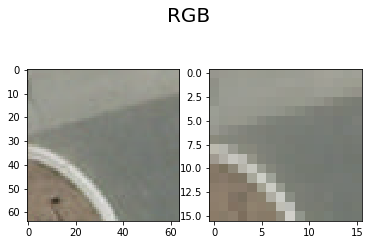

In [4]:
ix = 12
normalized_around_zero = False

if normalized_around_zero:
    plt.figure().suptitle('RGB+Infra', fontsize=20)
    plt.subplot(1,2,1)
    plt.imshow(utils.un_normalize(im_hr[ix,:,:,:]))
    plt.subplot(1,2,2)
    plt.imshow(utils.un_normalize(im_lr[ix,:,:,:]))

    plt.figure().suptitle('RGB', fontsize=20)
    plt.subplot(1,2,1)
    plt.imshow(utils.un_normalize(im_hr[ix,:,:,0:3]))
    plt.subplot(1,2,2)
    plt.imshow(utils.un_normalize(im_lr[ix,:,:,0:3]))
else:
    plt.figure().suptitle('RGB+Infra', fontsize=20)
    plt.subplot(1,2,1)
    plt.imshow(im_hr[ix,:,:,:])
    plt.subplot(1,2,2)
    plt.imshow(im_lr[ix,:,:,:])

    plt.figure().suptitle('RGB', fontsize=20)
    plt.subplot(1,2,1)
    plt.imshow(im_hr[ix,:,:,0:3])
    plt.subplot(1,2,2)
    plt.imshow(im_lr[ix,:,:,0:3])

In [5]:
# Prototype the Dense SR GAN
#from importlib import reload
reload(DenseSRGAN)

NameError: name 'DenseSRGAN' is not defined

In [6]:
import DenseSRGAN
gan = DenseSRGAN.DenseSRGAN(dir_pfx,im_hr,im_lr,gpu_list=[5,7],dropout_rate=0.3)
#gan = DenseSRGAN.DenseSRGAN(dir_pfx,im_hr,im_lr,dropout_rate=0.3)


#gan = DenseSRGAN.DenseSRGAN(dir_pfx,im_hr[0:17,:,:,:],im_lr[0:17,:,:,:],dropout_rate=0.3)
#gan = DenseSRGAN.DenseSRGAN(dir_pfx,im_hr,im_lr,num_gpus=[6],dropout_rate=0.3)
#gan = DenseSRGAN.DenseSRGAN(dir_pfx,im_hr,im_lr,num_gpus=4,dropout_rate=0.3,weights_path='weights/')

0


In [7]:
#gan.dropout_rate = .5
gan.train(epochs=11,verbose=False,bench_idx=2000,batch_size=16,save_interval=10,view_interval=5)

/usr/local/lib/python3.5/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


ResourceExhaustedError: OOM when allocating tensor with shape[400] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node H2_5_btlnck_bn/cond/FusedBatchNorm}} = FusedBatchNorm[T=DT_FLOAT, data_format="NCHW", epsilon=1.1e-05, is_training=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](H2_5_btlnck_bn/cond/FusedBatchNorm/Switch, H2_5_btlnck_bn/cond/FusedBatchNorm/Switch_1, H2_5_btlnck_bn/cond/FusedBatchNorm/Switch_2, H2_5_btlnck_bn/cond/FusedBatchNorm/Switch_3, H2_5_btlnck_bn/cond/FusedBatchNorm/Switch_4)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node FC_out__sigmoid/Sigmoid/_1293}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_1308_FC_out__sigmoid/Sigmoid", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


In [81]:
self.disc.save(dir_pfx + 'weights/discriminator_weights.h5')

NameError: name 'self' is not defined

In [50]:
np.min(im_lr[ix:ix+1,:,:,:])

-0.36470588235294116

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


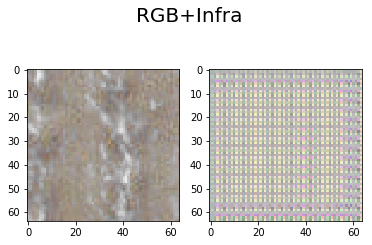

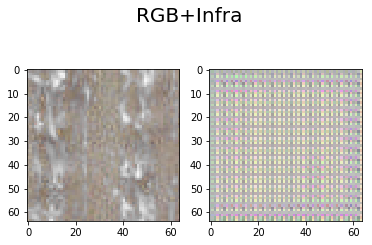

In [47]:
# 1117, 
ix = 10
ix2 = 11

img = gan.gen.predict(im_lr[ix:ix+1,:,:,:]).squeeze()
img = (img + 1)/2
plt.figure().suptitle('RGB+Infra', fontsize=20)
plt.subplot(1,2,1)
plt.imshow(im_hr[ix,:,:,:])
plt.subplot(1,2,2)
plt.imshow(img)

img = gan.gen.predict(im_lr[ix2:ix2+1,:,:,:]).squeeze()
img = (img + 1)/2
plt.figure().suptitle('RGB+Infra', fontsize=20)
plt.subplot(1,2,1)
plt.imshow(im_hr[ix2,:,:,:])
plt.subplot(1,2,2)
plt.imshow(img)

Mean Loss Real Images: 0.4030747711658478
Mean Loss False Images: 0.4107280969619751


ValueError: x and y can be no greater than 2-D, but have shapes (500,) and (500, 4, 4)

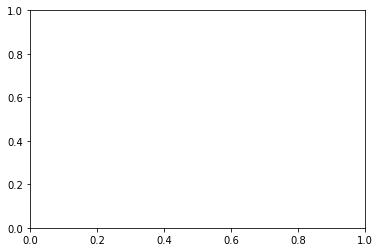

In [14]:
floss = []
tloss = []

for i in np.random.randint(low=0,high=len(im_lr),size=(500)):
  tloss.append(gan.disc.predict(im_hr[i:i+1,:,:,:]).squeeze())
  floss.append(gan.disc.predict(gan.gen.predict(im_lr[i:i+1,:,:,:])).squeeze())

  
print('Mean Loss Real Images: {0}'.format(np.mean(tloss)))
print('Mean Loss False Images: {0}'.format(np.mean(floss)))


plt.figure()
plt.plot(list(range(len(tloss))),tloss)
plt.plot(list(range(len(floss))),floss)
plt.legend(['Loss Real Images','Loss Generated Images'])
plt.xlabel('Random Sample Number')
plt.ylabel('Cross Entropy Loss')
plt.show

In [22]:
len(floss)

1000